## Wearable Tech: Week 2 Assignment

### Step 1

In [48]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

#turns off warning for chained assignment as we are overwriting references to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 30)

df = pd.read_csv("../Data/Soccer.csv", parse_dates=["Date"])
df.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06


### Step 2

In [49]:
# use only sessions periods from the season
dfs= df[df['Period.Name']== 'Session']
dfs['Period.Name'].value_counts()

Session    2131
Name: Period.Name, dtype: int64

### Step 3

In [50]:
# create session duration variable 
dfs['session_duration']= dfs['Total.Player.Load'] / dfs['Player.Load.Per.Minute']
dfs.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,session_duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667


In [52]:
# cleans up dataset
columns_to_keep =['Date', 'Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load', 'session_duration']
dfs= dfs[columns_to_keep]
dfs

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,session_duration
0,2019-08-06,12,Session,D,276.85373,18.054328
1,2019-08-06,89,Session,GK,238.00543,16.941335
2,2019-08-06,63,Session,F,231.84551,16.143162
3,2019-08-06,15,Session,D,355.02606,18.900662
4,2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...,...
9499,2019-11-24,23,Session,GK,185.24280,39.749968
9500,2019-11-24,21,Session,D,1364.75000,138.183361
9501,2019-11-24,43,Session,M,1294.72809,115.050023
9502,2019-11-24,91,Session,F,633.34450,91.195626


### Step 4

In [56]:
# rank team players by cumulative playerload across the entire season
dfs.groupby(['Player.Name', 'Position.Name'])['Total.Player.Load'].sum().sort_values(ascending=False)


Player.Name  Position.Name
43           M                61807.06587
62           F                55455.84319
4            M                54531.06541
21           D                52448.84502
44           D                45528.61318
66           M                44035.16557
100          D                43435.17877
39           D                42966.83272
12           D                42594.47149
52           D                41966.27363
35           F                39743.46043
86           M                38332.92067
10           D                35760.14918
63           F                34497.65386
15           D                32792.41598
18           D                28582.29879
97           F                28388.64588
49           F                28331.33281
91           F                27545.34959
48           M                26757.18323
34           M                26380.69503
89           GK               25943.30417
9            F                24544.28285
95     

### Step 5

In [17]:
# determine the 10 highest sessions for playerload and observe how many of these occured on game days
dfs.groupby('Date')[['Total.Player.Load', 'session_duration']].sum().sort_values(by='session_duration', ascending=False).head(10)

,Total.Player.Load,session_duration
Date,,
2019-08-07,24458.90002,4742.404303
2019-08-09,22308.06728,3802.305693
2019-08-13,17853.77719,3708.964834
2019-08-06,24719.77124,3292.163141
2019-09-11,11925.29068,3291.745734
2019-09-01,21220.17533,3144.533087
2019-10-03,17271.03882,2486.367108
2019-10-19,18262.74213,2432.119131
2019-09-13,18010.27556,2405.110558


### Step 6

In [58]:
# remove two players wiht lowest cumulative player load 
#(dfs.groupby(['Player.Name', 'Position.Name'])[['session_duration']].sum().sort_values(by='session_duration', ascending = False))
dfs.nlargest(20, 'Total.Player.Load')

# player 43 has 70% of the top 10 dates 

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,session_duration
8482,2019-11-08,43,Session,M,1755.08710,148.066633
9338,2019-11-22,43,Session,M,1701.65860,132.453449
4874,2019-09-19,62,Session,F,1695.69403,132.740540
4883,2019-09-19,43,Session,M,1672.69440,122.105177
4489,2019-09-13,43,Session,M,1649.17551,144.883878
5697,2019-09-29,4,Session,M,1641.06146,152.628626
3536,2019-09-01,43,Session,M,1635.75719,168.703635
5703,2019-09-29,43,Session,M,1617.42587,134.873157
8471,2019-11-08,62,Session,F,1576.30459,148.066684
5937,2019-10-03,4,Session,M,1565.28558,157.649922


### Step 7 

In [59]:
dfs= dfs.set_index('Player.Name')

In [60]:
# drop certain players
dfs= dfs.drop([98,62,89,23,71])
dfs.head()

,Date,Period.Name,Position.Name,Total.Player.Load,session_duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
35,2019-08-06,Session,F,315.51553,18.900672


In [63]:
# make date the index again 
dfs= dfs.set_index('Date', append=True)
dfs.head()

KeyError: "None of ['Date'] are in the columns"

In [64]:
# take player name out of index
dfs= dfs.reset_index('Player.Name')
dfs.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,session_duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
2019-08-06,35,Session,F,315.51553,18.900672


In [65]:
# mkae player name as object
dfs['Player.Name']= dfs['Player.Name'].astype('object')

In [67]:
# get data for player 43 only
df_43= dfs[dfs['Player.Name'] == 43]
df_43= df_43.resample('D').sum()
df_43.fillna(0, inplace=True)
df_43.head()

,Total.Player.Load,session_duration
Date,,
2019-08-06,1384.29407,148.599858
2019-08-07,1231.07260,192.827240
2019-08-08,0.00000,0.000000
2019-08-09,1258.91826,163.980353
2019-08-10,614.87480,86.198288


In [68]:
# plot acute_pl and chronic_pl
df_43['Acute_PL'] = (df_43.loc[:, "Total.Player.Load"].rolling('3D',3).sum())/3
df_43['Chronic_PL'] = (df_43.loc[:, 'Total.Player.Load'].rolling('21D',21).sum())/3
df_43['Acute:Chronic']= df_43['Acute_PL']/ df_43.Chronic_PL
df_43.head()

,Total.Player.Load,session_duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,1384.29407,148.599858,NaN,NaN,NaN
2019-08-07,1231.07260,192.827240,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,871.788890,NaN,NaN
2019-08-09,1258.91826,163.980353,829.996953,NaN,NaN
2019-08-10,614.87480,86.198288,624.597687,NaN,NaN


### Step 8

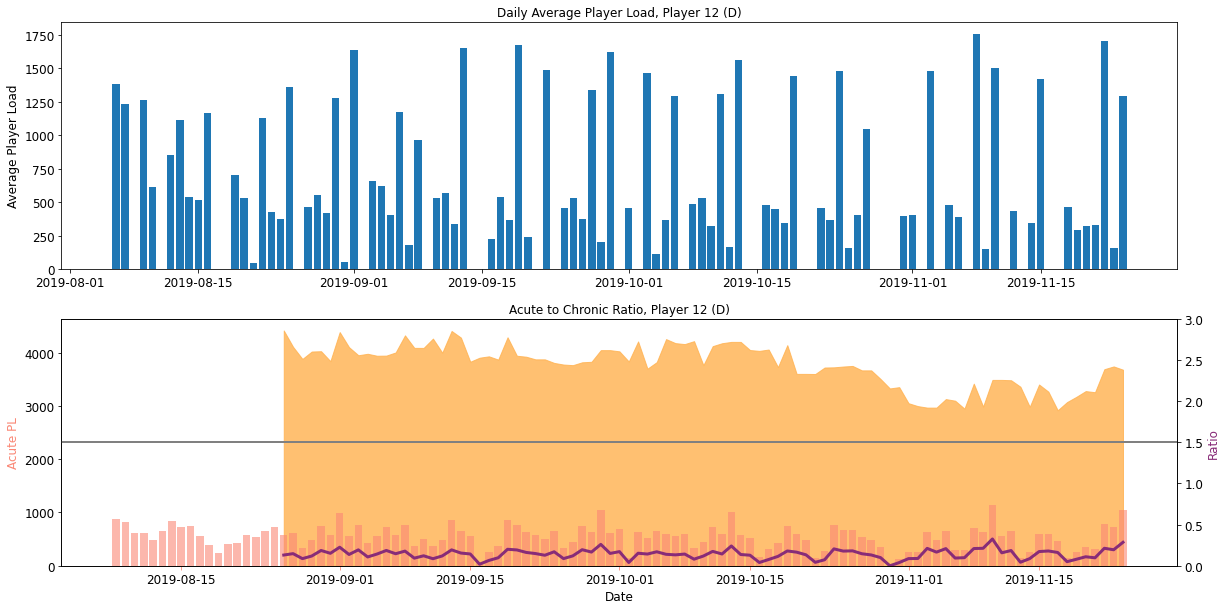

In [69]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_43.index, df_43["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 12 (D)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_43.index, df_43["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)
color='#FFB14E'
axs[1].fill_between(df_43.index, df_43["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 12 (D)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_43.index, df_43["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

# pink bar are Acute_PL
# orange shadding is Chronic_PL
# purple line is Acute:Chronic

In [73]:
df_all = dfs.groupby("Date").sum()
df_all = df_all.resample('D').sum()
df_all = df_all.fillna(0)

df_all["Acute_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
df_all["Chronic_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
df_all["Acute:Chronic"] = df_all.loc[:,"Acute_PL"]/df_all.loc[:,"Chronic_PL"]
df_all.head()

,Total.Player.Load,session_duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,21457.62648,2718.800956,NaN,NaN,NaN
2019-08-07,21576.70582,3960.461380,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,14344.777433,NaN,NaN
2019-08-09,19715.55092,3173.360914,13764.085580,NaN,NaN
2019-08-10,8707.56628,1653.143806,9474.372400,NaN,NaN


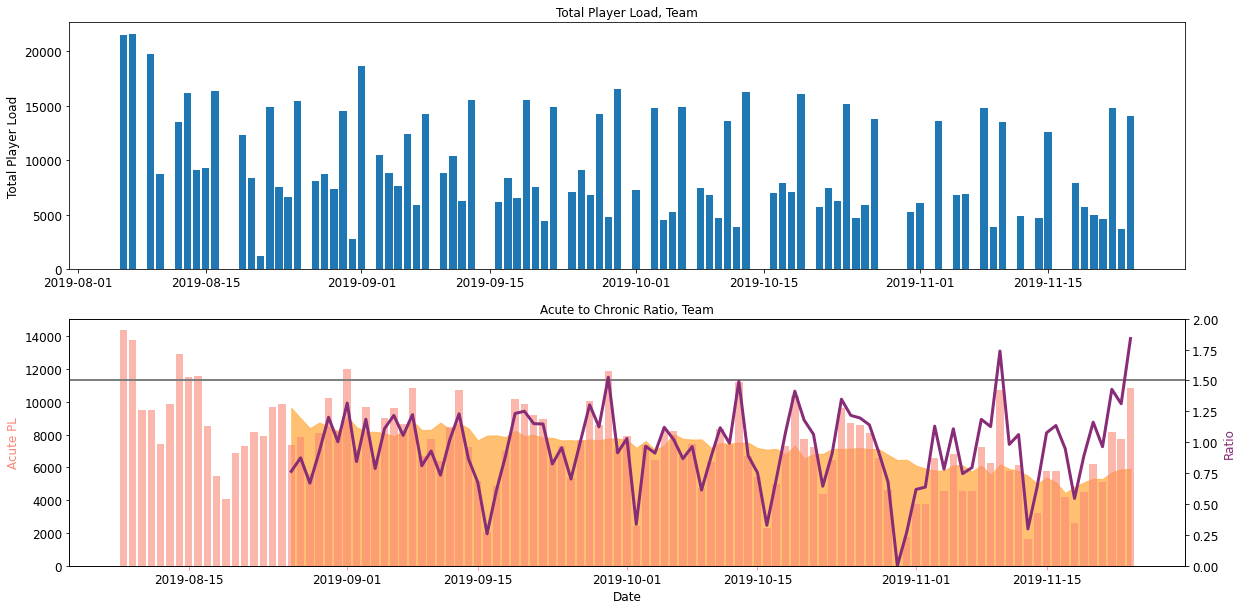

In [74]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_all.index, df_all["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all.index, df_all["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_all.index, df_all["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all.index, df_all["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,2.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

### Step 9

In [75]:
df_all.nlargest(5, 'Acute:Chronic')

,Total.Player.Load,session_duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-11-24,14027.23956,1558.522129,10856.481493,5902.242050,1.839383
2019-11-10,13527.89556,1552.761600,10746.631557,6181.182352,1.738605
2019-09-29,16510.51763,1955.542138,11844.918730,7760.283862,1.526351
2019-10-13,16228.67178,1933.122200,11224.619850,7513.621718,1.493903
2019-11-22,14833.59227,1680.056468,8150.606677,5705.682994,1.428507


### Step 10

In [77]:
df_all.nsmallest(50, 'session_duration')
# determine how many days of rest the team had (days with zero) Answer = 26,
# determine what day the team had the lowest total session duration: Aug 21st. (day before first real game)

,Total.Player.Load,session_duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-08,0.00000,0.000000,14344.777433,NaN,NaN
2019-08-11,0.00000,0.000000,9474.372400,NaN,NaN
2019-08-17,0.00000,0.000000,8544.453713,NaN,NaN
2019-08-18,0.00000,0.000000,5454.673143,NaN,NaN
2019-08-26,0.00000,0.000000,7361.054340,9631.933594,0.764234
...,...,...,...,...,...
2019-10-05,5285.40036,1042.633011,8213.273557,7327.068464,1.120949
2019-11-19,5677.10753,1043.887005,4515.243710,5081.013905,0.888650
2019-10-08,7419.11446,1046.000076,7426.851873,7695.638506,0.965073
